In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/lucifarroy/Desktop/DIY Solution Day 54 10.35.47 PM/Mall_Customers.csv')


print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
correlation_matrix = df.corr()


least_correlated_column = correlation_matrix.min().idxmin()


df.drop(least_correlated_column, axis=1, inplace=True)

print(df.head())


   CustomerID  Gender  Annual Income (k$)  Spending Score (1-100)
0           1    Male                  15                      39
1           2    Male                  15                      81
2           3  Female                  16                       6
3           4  Female                  16                      77
4           5  Female                  17                      40


/var/folders/zv/q3tls0x13sjc_7kklsyhj0n80000gn/T/ipykernel_21616/4053206584.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


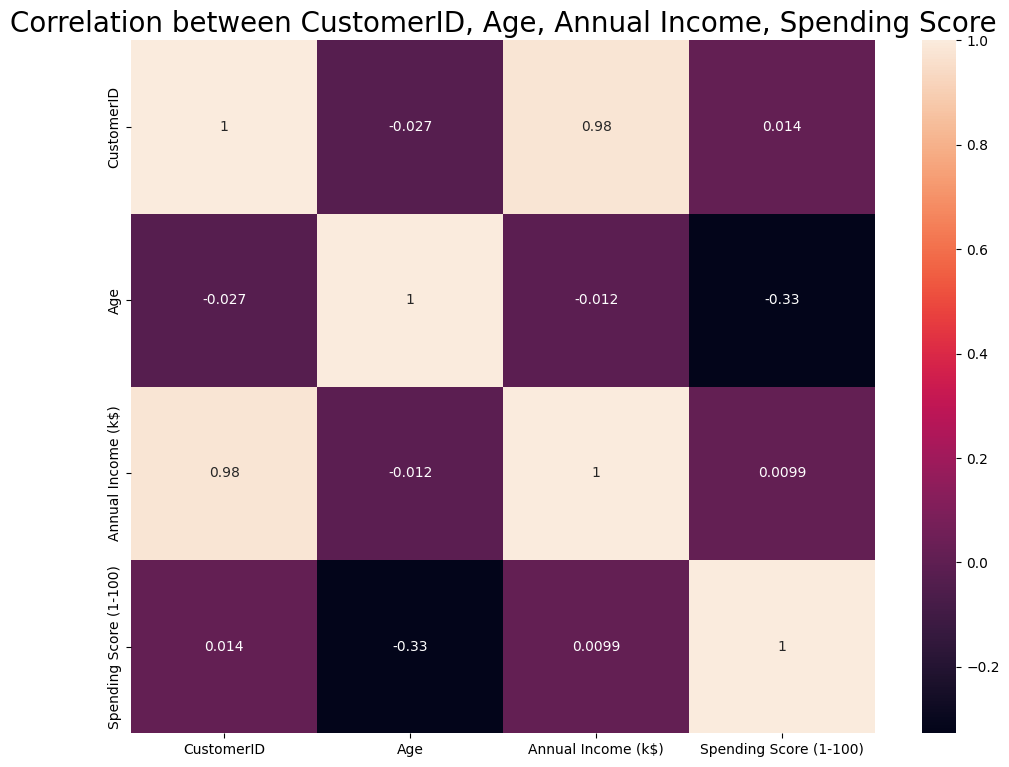

In [8]:
plt.subplots(figsize=(12,9))
sns.heatmap(correlation_matrix ,annot=True)
plt.title('Correlation between CustomerID, Age, Annual Income, Spending Score', fontsize = 20)
plt.show()

In [4]:

df_encoded = pd.get_dummies(df, columns=['Gender'])


print(df_encoded.head())


   CustomerID  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1                  15                      39              0   
1           2                  15                      81              0   
2           3                  16                       6              1   
3           4                  16                      77              1   
4           5                  17                      40              1   

   Gender_Male  
0            1  
1            1  
2            0  
3            0  
4            0  


In [10]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(df_encoded)

DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 


In [11]:

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes


,DBSCAN_size
Cluster,
-1,21
0,12
1,104
2,5
3,33
4,11
5,14


In [12]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

ax=sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='Set1', legend='full', s=45)

ax.set_xlabel('Annual Income (k$)', fontsize = 10)
ax.set_ylabel('Spending Score (1-100)', fontsize = 10)
ax.set_title('How annual income corresponds to the spending rate ', fontsize = 15)

TypeError: scatterplot() got multiple values for argument 'data'